<a href="https://colab.research.google.com/github/heitorabqg/datascientist/blob/master/PSI5892_perceptron_Ros_reg_log_Final1025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para abrir o notebook no Google Colab, altere o domínio `github.com` para `githubtocolab.com`

<div class="alert alert-block alert-danger">
Para praticar programação, é importante que você erre, leia as mensagens de erro e tente corrigí-los.
    
Dessa forma, no Google Colab, é importante que você DESATIVE OS RECURSOS DE AUTOCOMPLETAR:

- Menu Ferramentas -> Configurações
- Na janela que é aberta:
  - Seção Editor -> Desativar "Mostrar sugestões de preenchimento de código com base no contexto"
  - Seção Assistência de IA -> Desabilitar itens

Na versão em inglês:

- Menu Tools -> Settings
- Na janela que é aberta:
  - Seção Editor -> Desativar "Show context-powered code completions"
  - Seção AI Assistance -> Desabilitar itens
</div>

# PSI5892 - Aula de Exercícios

# Perceptron de Rosenblatt e Regressão Logística

# Exercício 1

Neste exercício vamos utilizar o neurônio de Rosenblatt para implementar a função lógica AND.

Iniciamos importando as bibliotecas necessárias para implementar o neurônio de Rosenblatt.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Vamos gerar os dados de treinamento do problema começando pelo AND.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [14]:
Nt = 100  # número de pontos de treinamento

#############
# x deve ser uma matriz com Nt linhas e 2 colunas com valores 0 ou 1 aleatórios,
# que pode ser gerada usando as funções np.round e np.random.uniform.
# d deve ser um vetor coluna com Nt linhas contendo o resultado da função lógica
# AND aplicada ao vetor x. Para isso use a função np.logical_and.
# Note que a função np.logical_and devolve um vetor com elementos do tipo boolean.
# Para transformar os elementos para o tipo inteiro, basta multiplicá-lo por 1
# ou usar o método .astype(int)

#x =
x = np.round(np.random.uniform(0, 1, (Nt, 2)))

#d = 1*()
d = 1*(np.logical_and(x[:,0], x[:,1]))
d = d.reshape(-1, 1)
#############

A função a seguir implementa o neurônio de Rosenblatt no modo mini-batch. Modifique o programa do algoritmo LMS no modo mini- inserindo a função de ativação.
Para obter 0 ou 1 na saída, deve-se usar a função degrau em vez da função sinal. Para isso, use a função `np.heaviside`.
Uma outra modificação que deve ser considerada é a inicialização dos pesos e bias, que agora devem ser inicializados com valores aleatórios uniformemente distribuídos no intervalo [-dw, dw].

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [15]:
def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """
    #############

    M = x.shape[1]
    #print("\nValor de M", M)
    Nmb = int(np.floor(Nt / Nb))
    #print("Valor de Nmb", Nmb)

    # inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
    W = np.random.uniform(-dw, dw, (Ne*Nmb + 1, M+1))
    #print("\nDimensao W", W.shape)

    # juntar o sinal de entrada e o sinal desejado em um único vetor e incluir 1s para o bias
    Xd = np.hstack((np.ones((Nt, 1)), x, d))
    #print("\Dimensao Xd", Xd.shape)

    # epocas\n",
    for k in range(Ne):
            # embaralha dados
            np.random.shuffle(Xd)

            # x e d organizados em X(l) e d(l)
            X_l = Xd[:, :-1]
            D_l = Xd[:, -1].reshape(-1, 1)

            # mini-batches\n",
            for l in range(Nmb):

              # percorre os dados de Nb em Nb, Nmb vezes
              inicio = l * Nb
              fim = inicio + Nb

              # coloca Nbx(Mb+1) elementos em X e Nbx1 em d
              xmb = X_l[inicio:fim, :]
              dmb = D_l[inicio:fim, :]


              m = k * Nmb + l

              # todas as entradas(X_l) do mimi-batch multiplicadas pelos coeficientes do mini-batch
              # v = [Nb x (M+1)] x [M+1 x 1] = [Nb x 1]
              v = xmb @ W[m, :].reshape(-1,1)

              y = np.heaviside(v,1)

              # erro no mini-batch
              e = dmb - y
              #print("\nDimensao e", e.shape)

              # gradiente com taxa ajustada
              grad = (eta/Nb) * (e.T @ xmb)
              #print("\nDimensao grad", grad.shape)
              #print("\nDimensao xmb", xmb.shape)

              #W[[m + 1], :] =
              W[m + 1, :] = W[m, :] + grad

    return W
    # return W
    #############



In [16]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2

#############  Complete o código a seguir
W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

# Wfinal deve ser os valores de pesos e bias da última iteração
Wfinal = W[-1]
Wfinal = Wfinal.reshape(1,-1)
print("\nWfinal =", Wfinal )
#############


Wfinal = [[-0.36207398  0.18243392  0.18160981]]


<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

Text(0.5, 1.0, 'pesos e bias ao longo das iterações')

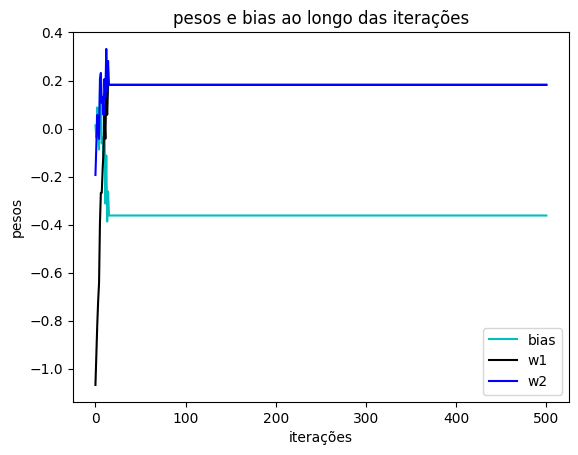

In [17]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações

#plt.plot(W, "k", label="W")
plt.plot(W[:,0], linestyle='solid', label='bias', color='c')
plt.plot(W[:,1], linestyle='solid', label='w1', color='k')
plt.plot(W[:,2], linestyle='solid', label='w2', color='b')

plt.xlabel("iterações")
plt.ylabel("pesos")
plt.legend()
plt.title(
    "pesos e bias ao longo das iterações"
)




<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

Taxa de erro: 0.00%


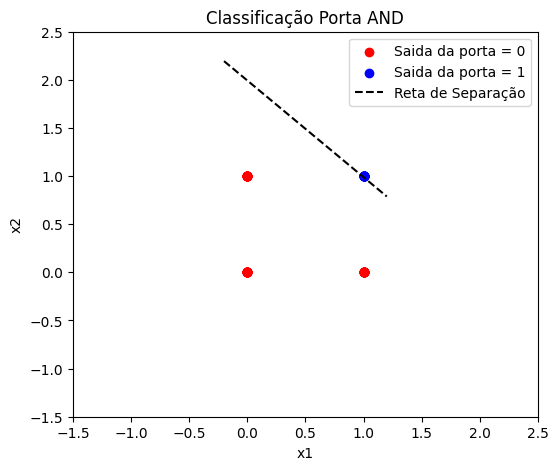


É possível utilizar o neurônio de Rosenblatt para implementar função lógica AND.

O sistema é capaz de aprender como reproduzir a saida desejada.


In [18]:
# Gere os dados de teste, calcule a taxa de erro e gere a reta de separação das
# regiões, mostrando em um mesmo gráfico a reta e os dados de teste classificados.
# Comente o resultado, explicando se é possível utilizar o neurônio de Rosenblatt
# para implementar esta função lógica.


#############
# geração de dados de teste
#############

# número de pontos de teste
Nteste = 100

#x_teste
x_teste = np.round(np.random.uniform(0, 1, (Nteste, 2)))

#d_teste
d_teste = 1*(np.logical_and(x_teste[:,0], x_teste[:,1]))
d_teste = d_teste.reshape(-1,1)

#print("\nW[-1]", W[-1].shape)

#############
#############
#############

# calculo da taxa de erro

#############
#############
#############

# incluir 1 nos valores de X para o bias
X_teste = np.hstack((np.ones((Nteste, 1)), x_teste))
#print("\nDimensao X_teste", X_teste.shape)
v_teste = X_teste @ Wfinal.reshape(-1,1)
y_teste = np.heaviside(v_teste,1)
#print("\ny_teste", y_teste)
#print("\nDimensao y_teste", y_teste.shape)

erro_teste = d_teste - y_teste
#print(len(erro_teste))
taxa_de_erro_teste = np.sum(np.abs(erro_teste))/len(d_teste)
taxa_de_erro_teste_2 = np.mean(y_teste != d_teste)
#print(taxa_de_erro_teste)

print(f"Taxa de erro: {taxa_de_erro_teste:.2%}")



# Reta de separação das regiões (reta e os dados de teste classificados)

# Funcao para plotar resultados

def plot_fronteira(x, d, W, title):
    plt.figure(figsize=(6,5))
    plt.scatter(x[d[:,0]==0, 0], x[d[:,0]==0, 1], c='red', label='Saida da porta = 0')
    plt.scatter(x[d[:,0]==1, 0], x[d[:,0]==1, 1], c='blue', label='Saida da porta = 1')

    # Separacao
    x1 = np.linspace(-0.2, 1.2, 100)
    w0, w1, w2 = W.flatten()
    x2 = -(w0 + w1*x1)/w2
    plt.plot(x1, x2, 'k--', label='Reta de Separação')

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-1.5, 2.5)
    plt.ylim(-1.5, 2.5)
    plt.legend()
    plt.show()

"""
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
"""


plot_fronteira(x_teste, d_teste, Wfinal.reshape(-1,1), 'Classificação Porta AND')



# Explicar se é possível utilizar o neurônio de Rosenblatt para implementar esta função lógica.

print("\nÉ possível utilizar o neurônio de Rosenblatt para implementar função lógica AND.")
print("\nO sistema é capaz de aprender como reproduzir a saida desejada.")


# Exercício 2

Repita o exercício anterior considerando as portas lógicas OR e o XOR.

## Resolução


Wfinal do OR = [[-0.06887705  0.20998266  0.22943755]]


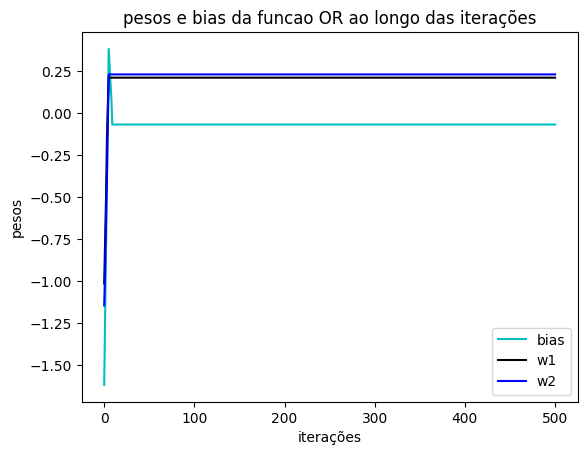

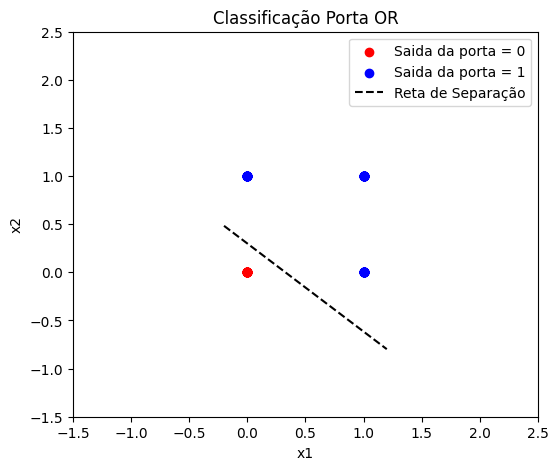

Taxa de erro na funcao OR: 0.00%
Taxa de erro na funcao OR: 0.00%

É possível utilizar o neurônio de Rosenblatt para implementar função lógica OR.

O sistema é capaz de aprender como reproduzir a saida desejada.

Wfinal do XOR = [[-0.06242964 -0.00487722 -0.09851361]]


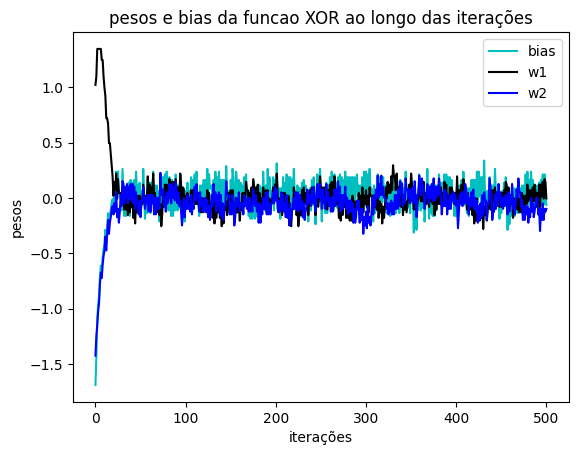

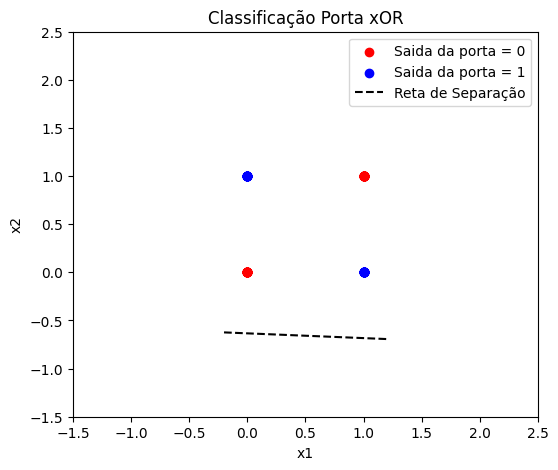

Taxa de erro na funcao XOR: 44.00%

Não é possível utilizar o neurônio de Rosenblatt para implementar função lógica XOR.

O sistema não é capaz de separar a saida desejada.


In [19]:
Nt = 100  # número de pontos de treinamento

#############
# Porta OR
#############

# Gerar x e d para porta OR
x = np.round(np.random.uniform(0, 1, (Nt, 2)))

d = 1*(np.logical_or(x[:,0], x[:,1]))
d = d.reshape(-1, 1)

# Chamar a funcao Rosenblatt

eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2

W_or = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

# Wfinal deve ser os valores de pesos e bias da última iteração
Wfinal_or = W_or[-1]
Wfinal_or = Wfinal_or.reshape(1,-1)
print("\nWfinal do OR =", Wfinal_or )


# Plotando o grafico
#############
# Gerar um gráfico para mostrar os pesos e bias ao longo das iterações
#############
plt.plot(W_or[:,0], linestyle='solid', label='bias', color='c')
plt.plot(W_or[:,1], linestyle='solid', label='w1', color='k')
plt.plot(W_or[:,2], linestyle='solid', label='w2', color='b')

plt.xlabel("iterações")
plt.ylabel("pesos")
plt.legend()
plt.title(
    "pesos e bias da funcao OR ao longo das iterações"
)



#############
# geração de dados de teste
#############

# número de pontos de teste
Nteste = 100

#x_teste
x_teste_or = np.round(np.random.uniform(0, 1, (Nteste, 2)))

#d_teste
d_teste_or = 1*(np.logical_or(x_teste_or[:,0], x_teste_or[:,1]))
d_teste_or = d_teste_or.reshape(-1,1)


#############
# calculo da taxa de erro
#############

# incluir 1 nos valores de X para o bias
X_teste_or = np.hstack((np.ones((Nteste, 1)), x_teste_or))
#print("\nDimensao X_teste", X_teste.shape)

v_teste_or = X_teste_or @ Wfinal_or.reshape(-1,1)

y_teste_or = np.heaviside(v_teste_or,1)
#print("\ny_teste", y_teste)
#print("\nDimensao y_teste", y_teste.shape)

erro_teste_or = d_teste_or - y_teste_or
#print(len(erro_teste))
taxa_de_erro_teste_or = np.sum(np.abs(erro_teste_or))/len(d_teste_or)
taxa_de_erro_teste_2_or = np.mean(y_teste_or != d_teste_or)
#print(taxa_de_erro_teste)

#############
# Reta de separação das regiões (reta e os dados de teste classificados)
#############

plot_fronteira(x_teste_or, d_teste_or, Wfinal_or.reshape(-1,1), 'Classificação Porta OR')

#############
# Explicar se é possível utilizar o neurônio de Rosenblatt para implementar esta função lógica.
#############

print(f"Taxa de erro na funcao OR: {taxa_de_erro_teste_or:.2%}")
print(f"Taxa de erro na funcao OR: {taxa_de_erro_teste_2_or:.2%}")

print("\nÉ possível utilizar o neurônio de Rosenblatt para implementar função lógica OR.")
print("\nO sistema é capaz de aprender como reproduzir a saida desejada.")


########
##############
####################

Nt = 100  # número de pontos de treinamento

#############
# Porta XOR
#############

# Gerar x e d para porta OR
x = np.round(np.random.uniform(0, 1, (Nt, 2)))

d = 1*(np.logical_xor(x[:,0], x[:,1]))
d = d.reshape(-1, 1)

# Chamar a funcao Rosenblatt

eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2

W_xor = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

# Wfinal deve ser os valores de pesos e bias da última iteração
Wfinal_xor = W_xor[-1]
Wfinal_xor = Wfinal_xor.reshape(1,-1)
print("\nWfinal do XOR =", Wfinal_xor )


# Plotando o grafico
#############
# Gerar um gráfico para mostrar os pesos e bias ao longo das iterações
#############
plt.plot(W_xor[:,0], linestyle='solid', label='bias', color='c')
plt.plot(W_xor[:,1], linestyle='solid', label='w1', color='k')
plt.plot(W_xor[:,2], linestyle='solid', label='w2', color='b')

plt.xlabel("iterações")
plt.ylabel("pesos")
plt.legend()
plt.title(
    "pesos e bias da funcao XOR ao longo das iterações"
)



#############
# geração de dados de teste
#############

# número de pontos de teste
Nteste = 100

#x_teste
x_teste_xor = np.round(np.random.uniform(0, 1, (Nteste, 2)))

#d_teste
d_teste_xor = 1*(np.logical_xor(x_teste_xor[:,0], x_teste_xor[:,1]))
d_teste_xor = d_teste_xor.reshape(-1,1)


#############
# calculo da taxa de erro
#############

# incluir 1 nos valores de X para o bias
X_teste_xor = np.hstack((np.ones((Nteste, 1)), x_teste_xor))

v_teste_xor = X_teste_xor @ Wfinal_xor.reshape(-1,1)

y_teste_xor = np.heaviside(v_teste_xor,1)

erro_teste_xor = d_teste_xor - y_teste_xor

taxa_de_erro_teste_xor = np.sum(np.abs(erro_teste_xor))/len(d_teste_xor)
taxa_de_erro_teste_2_xor = np.mean(y_teste_xor != d_teste_xor)


#############
# Reta de separação das regiões (reta e os dados de teste classificados)
#############

plot_fronteira(x_teste_xor, d_teste_xor, Wfinal_xor.reshape(-1,1), 'Classificação Porta xOR')

#############
# Explicar se é possível utilizar o neurônio de Rosenblatt para implementar esta função lógica.
#############

print(f"Taxa de erro na funcao XOR: {taxa_de_erro_teste_xor:.2%}")


print("\nNão é possível utilizar o neurônio de Rosenblatt para implementar função lógica XOR.")
print("\nO sistema não é capaz de separar a saida desejada.")

# Exercício 3

Repita o exercício para as portas lógicas AND, OR e XOR considerando a otimização do modelo utilizando a regressão logística com as seguintes funções custo:
- Erro quadrático médio
- Entropia cruzada

## Resolução

In [20]:
# Funcao regressao logistica
def regressao_logistica(x, d, eta, Nt, Ne, custo='ent_cruzada'):

    M = x.shape[1]

    X = np.hstack((np.ones((Nt, 1)), x))

    W = np.zeros((M + 1,1))

    for _ in range(Ne):
        v = X @ W
        y = sigmoid(v)

        if custo == 'mse':
            e = d - y
            grad = (eta / Nt) * (X.T @ (e * y * (1 - y)))
        else:
            e = d - y
            grad = (eta / Nt) * (X.T @ e)

        W = W + grad
    return W

# Funcao sigmoidal
def sigmoid(v):
    return 1 / (1 + np.exp(-v))




In [21]:
# Funcao gerar dados para as portas AND, OR e XOR

def ger_dados_porta(porta, n_dados):

    x = np.round(np.random.uniform(0, 1, (n_dados, 2)))

    if porta == 'AND':
        d = 1*(np.logical_and(x[:,0], x[:,1]))
        d = d.reshape(-1, 1)

    elif porta == 'OR':
        d = 1*(np.logical_or(x[:,0], x[:,1]))
        d = d.reshape(-1, 1)

    elif porta == 'XOR':
        d = 1*(np.logical_xor(x[:,0], x[:,1]))
        d = d.reshape(-1, 1)
    return x, d


In [25]:
def tx_erro(x, d, w):
  # incluir 1 nos valores de X para o bias
  X = np.hstack((np.ones((x.shape[0], 1)), x))
  v = X @ w.reshape(-1,1)
  y = sigmoid(v)
  y = np.where(y >= 0.5, 1, -1)
  #y = np.heaviside(v,1)
  erro = d - y
  #tx_e = np.sum(np.abs(erro))/len(d)
  tx_e = np.mean(y != d)
  return tx_e


Porta AND

Custo: MSE

Pesos finais: [-8.50921279  5.45433325  5.70391603]

Taxa de erro = 80.00%


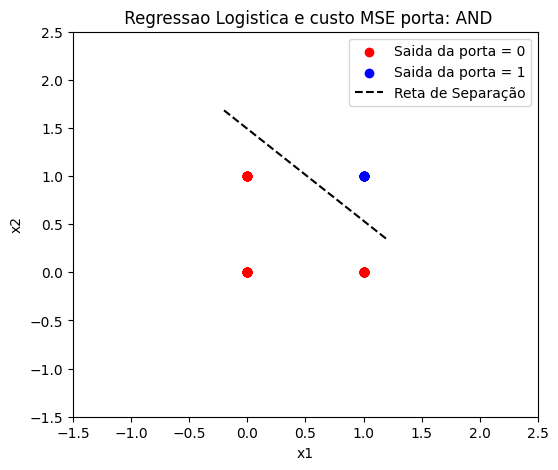


Porta AND

Custo: Entropia Cruzada

Pesos finais: [-15.86707588  10.17631493  10.63552286]

Taxa de erro = 80.00%


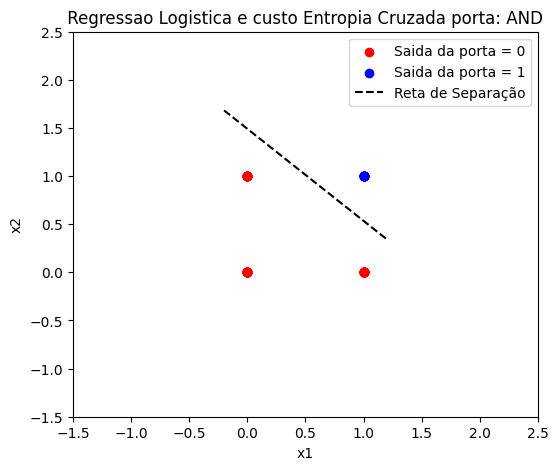


Porta OR

Custo: MSE

Pesos finais: [-3.05434194  6.39779592  6.57737995]

Taxa de erro = 29.00%


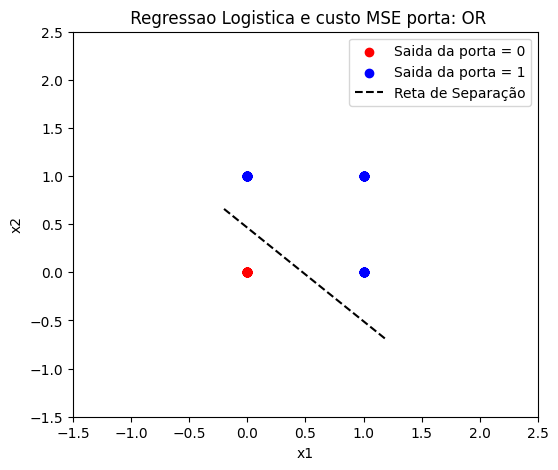


Porta OR

Custo: Entropia Cruzada

Pesos finais: [-5.65755958 11.86122799 12.19884392]

Taxa de erro = 29.00%


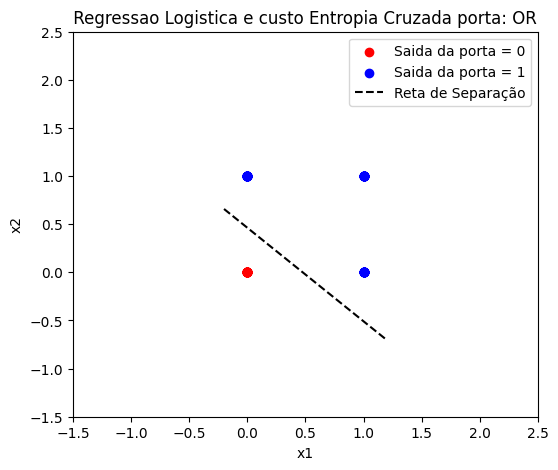


Porta XOR

Custo: MSE

Pesos finais: [ 0.57476959  0.09627676 -0.72095226]

Taxa de erro = 63.00%


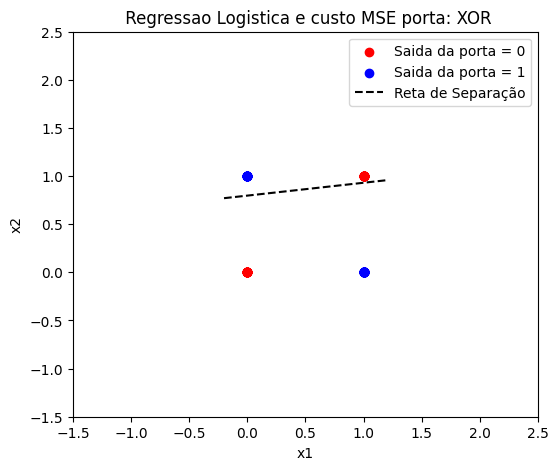


Porta XOR

Custo: Entropia Cruzada

Pesos finais: [ 0.48266658  0.28240989 -0.72173583]

Taxa de erro = 63.00%


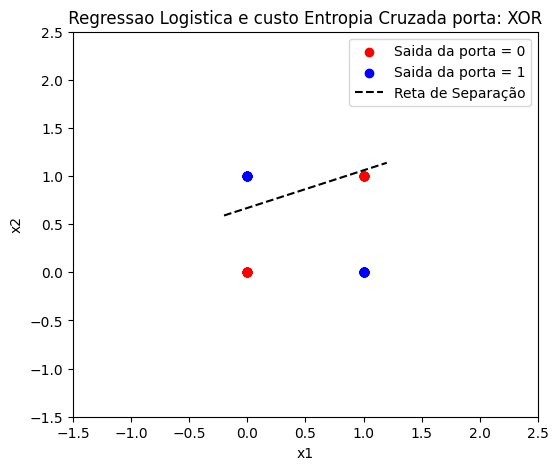

In [26]:

# ==========================================================
# Parametros de treinamento
# ==========================================================
eta = 0.5
Ne = 10000
Ndados = 100

# ==========================================================
# Execução para cada porta logica e funcao custo
# ==========================================================

for porta in ['AND', 'OR', 'XOR']:
    # ger_dados_porta(porta, n_dados)
    x, d = ger_dados_porta(porta, Ndados)

    #  MSE

    # regressao_logistica(x, d, eta, Nt, Ne, custo='mse'):
    W_mse = regressao_logistica(x, d, eta, Nt, Ne, 'mse')

    #############
    # calculo da taxa de erro
    #############
    print(f"\nPorta {porta}")
    print("\nCusto: MSE")
    print("\nPesos finais:", W_mse.flatten())

    ######### HA
    tx_MSE = tx_erro(x, d, W_mse)

    print(f"\nTaxa de erro = {tx_MSE*100:.2f}%")



    #############
    # Reta de separação das regiões (reta e os dados de teste classificados)
    #############

    # plot_fronteira(x, d, W, title)
    plot_fronteira(x, d, W_mse, f" Regressao Logistica e custo MSE porta: {porta}")

    # ENTROPIA CRUZADA

    # regressao_logistica(x, d, eta, Nt, Ne, custo='ent_cruzada')
    W_ec = regressao_logistica(x, d, eta, Nt, Ne, custo='ent_cruzada')

    #############
    # calculo da taxa de erro
    #############
    print(f"\nPorta {porta}")
    print("\nCusto: Entropia Cruzada")
    print("\nPesos finais:", W_ec.flatten())

    tx_EC = tx_erro(x, d, W_ec)
    print(f"\nTaxa de erro = {tx_EC*100:.2f}%")


    #############
    # Reta de separação das regiões (reta e os dados de teste classificados)
    #############

    # plot_fronteira(x, d, W, title)
    plot_fronteira(x, d, W_ec, f" Regressao Logistica e custo Entropia Cruzada porta: {porta} ")


In [24]:
print("\nObservamos novamente a capacidade de classificar as portas AND e OR, mas a incapacidade para porta XOR.")


Observamos novamente a capacidade de classificar as portas AND e OR, mas a incapacidade para porta XOR.
